In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


file_path= r"C:\Users\asus\Desktop\projects\retail_proj\data\raw_retail.csv"

df = pd.read_csv(file_path, encoding='utf-8')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom


In [54]:
df.shape

(541909, 8)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


## converting invoice date to date time format


In [56]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'], dayfirst=True)

print(df['InvoiceDate'].dtype)

df.head(3)

datetime64[ns]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


## handle missing description


In [57]:
missing_desc= df['Description'].isna().sum()

print("missing description count", missing_desc)

#dropping rows where desc is missing

df=df.dropna(subset=['Description'])

print("new shape after dropping missing desc rows", df.shape)

missing description count 1454
new shape after dropping missing desc rows (540455, 8)


## removing duplicates and cancellations

In [58]:
df= df.drop_duplicates()
print ("shape after dropping duplicates:", df.shape)

# 2. How many rows have negative Quantity (possible returns)?

neg_qty_count = (df['Quantity']<0).sum()
print("count of negative qts(returns)", neg_qty_count)

# filtering out negative

df= df[df["Quantity"]>0]
print("Shape after filtering negative quantities:", df.shape)

#Filter out cancellations: InvoiceNo starting with 'C'

cancel_count= (df['InvoiceNo']
               .astype(str)
               .str.startswith('C')
               .sum()
            )

print("Count of cancellations (InvoiceNo starts with 'C'):", cancel_count)

df= df[~df["InvoiceNo"].astype(str).str.startswith('C')]
print("Final shape after removing cancellations:", df.shape)


shape after dropping duplicates: (535187, 8)
count of negative qts(returns) 9725
Shape after filtering negative quantities: (525462, 8)
Count of cancellations (InvoiceNo starts with 'C'): 0
Final shape after removing cancellations: (525462, 8)


In [59]:
df['TotalPrice']= df['Quantity'] * df['UnitPrice']

print(df[['Quantity', 'UnitPrice', 'TotalPrice']]. head())

output_path= r"C:\Users\asus\Desktop\projects\retail_proj\data\clean_retail.csv"

df.to_csv(output_path, encoding='utf-8', index=False)
print(f"Cleaned dataset saved to: {output_path}")

   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\asus\\Desktop\\projects\\retail_proj\\data\\clean_retail.csv'

In [ ]:
product_summary=(
                df.groupby('Description')
                .agg(Total_Revenue=('TotalPrice', 'sum'),
                     Total_Quantity=('Quantity', 'sum'))
      .reset_index()
)

top_products = product_summary.sort_values(by='Total_Revenue', ascending=False).head(10)

print("Top 10 products by revenue:")
print(top_products)




Top 10 products by revenue:
                             Description  Total_Revenue  Total_Quantity
1072                      DOTCOM POSTAGE      206248.77             708
2867            REGENCY CAKESTAND 3 TIER      174156.54           13862
2401         PAPER CRAFT , LITTLE BIRDIE      168469.60           80995
3860  WHITE HANGING HEART T-LIGHT HOLDER      106236.72           37876
2427                       PARTY BUNTING       99445.23           18287
1827             JUMBO BAG RED RETROSPOT       94159.81           48375
2065      MEDIUM CERAMIC TOP STORAGE JAR       81700.92           78033
2706                             POSTAGE       78101.88            3150
2205                              Manual       77752.82            6991
2755                  RABBIT NIGHT LIGHT       66870.03           30739


C:\Users\asus\AppData\Local\Temp\ipykernel_16652\463219112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x= 'Total_Revenue', y='Description', palette='viridis')


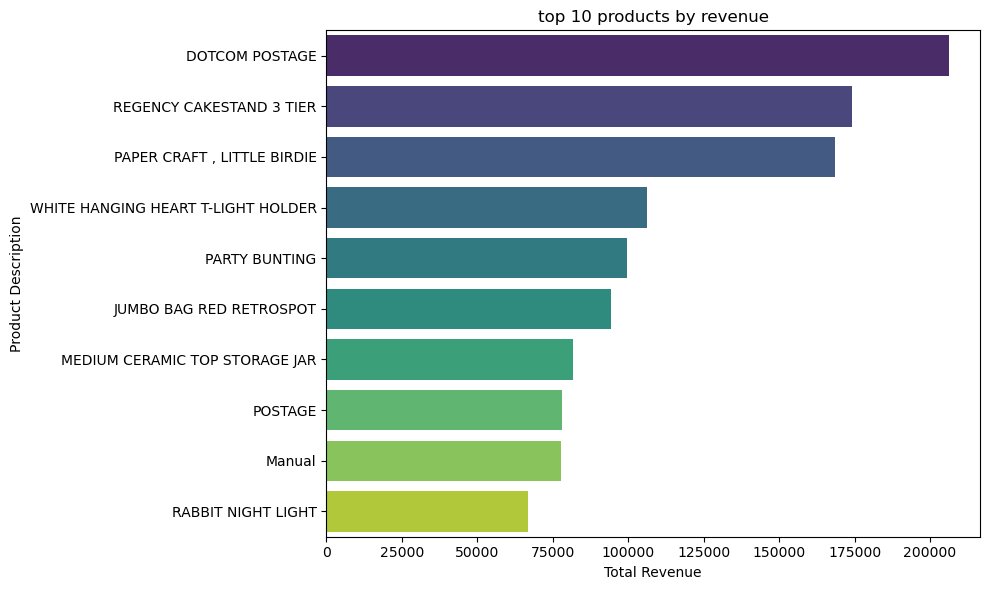

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x= 'Total_Revenue', y='Description', palette='viridis')
plt.title("top 10 products by revenue")
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

In [ ]:
#Create a monthly revenue summary

df['YearMonth']= df['InvoiceDate'].dt.to_period('M')
monthly_revenue=(
    df.groupby('YearMonth')['TotalPrice']
    .sum()
    .reset_index()
)

monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)

print("Monthly revenue head:")
print(monthly_revenue.head())

 #Plot monthly revenue
fig1 = px.line(
    monthly_revenue,
    x='YearMonth',
    y='TotalPrice',
    title='Monthly Revenue Trend',
    labels={'TotalPrice':'Revenue', 'YearMonth':'Month'}
)
fig1.show()

#Revenue by country (top 5 countries)
country_summary = (
    df.groupby('Country')['TotalPrice']
      .sum()
      .reset_index()
      .sort_values(by='TotalPrice', ascending=False)
)
top_countries = country_summary.head(5)
print("Top 5 countries by revenue:")
print(top_countries)

fig2 = px.bar(
    top_countries,
    x='Country',
    y='TotalPrice',
    title='Top 5 Countries by Revenue',
    labels={'TotalPrice':'Revenue'}
)
fig2.show()


Monthly revenue head:
  YearMonth  TotalPrice
0   2010-12  821452.730
1   2011-01  689811.610
2   2011-02  522545.560
3   2011-03  716215.260
4   2011-04  536968.491


Top 5 countries by revenue:
           Country   TotalPrice
36  United Kingdom  8979619.974
24     Netherlands   285446.340
10            EIRE   283140.520
14         Germany   228678.400
13          France   209625.370


In [ ]:

print("Columns currently in df:", df.columns.tolist())
df.head()

Columns currently in df: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'YearMonth']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [ ]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference date for recency calculation:", ref_date)

#Aggregate by CustomerID

cust_df = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (ref_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

print("Head of customer summary (first 5 rows):")
print(cust_df.head())

#Check summary statistics for Recency, Frequency, Monetary
print("\nSummary statistics:")
print(cust_df[['Recency','Frequency','Monetary']].describe())

Reference date for recency calculation: 2011-12-10 12:50:00
Head of customer summary (first 5 rows):
   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40

Summary statistics:
           Recency    Frequency      Monetary
count  4339.000000  4339.000000  4.339000e+03
mean     92.513482     4.640701  2.447565e+03
std     100.013669    25.449880  2.777505e+04
min       1.000000     1.000000  0.000000e+00
25%      18.000000     1.000000  3.064550e+02
50%      51.000000     2.000000  6.685800e+02
75%     142.000000     5.000000  1.660890e+03
max     374.000000  1602.000000  1.733264e+06


In [60]:
#Create RFM scores (1 to 5 each) using quintiles
cust_df['R_score'] = pd.qcut(cust_df['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
cust_df['F_score'] = pd.qcut(cust_df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
cust_df['M_score'] = pd.qcut(cust_df['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# 2. Combine scores into one RFM segment & score
cust_df['RFM_Segment'] = cust_df['R_score'].astype(str) \
                      + cust_df['F_score'].astype(str) \
                      + cust_df['M_score'].astype(str)
cust_df['RFM_Score'] = cust_df[['R_score','F_score','M_score']].sum(axis=1)

# 3. Use K-Means clustering for segmentation (optional advanced)
features = cust_df[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
cust_df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster counts:")
print(cust_df['Cluster'].value_counts())

print("Customer RFM head:")
print(cust_df.head())

Cluster counts:
Cluster
0    2902
2     810
3     626
1       1
Name: count, dtype: int64
Customer RFM head:
   CustomerID  Recency  Frequency  Monetary  R_score  F_score  M_score  \
0       12346      326          1  77183.60        1        1        5   
1       12347        2          7   4310.00        5        5        5   
2       12348       75          4   1797.24        2        4        4   
3       12349       19          1   1757.55        4        1        4   
4       12350      310          1    334.40        1        1        2   

  RFM_Segment  RFM_Score  Cluster  
0         115          7        3  
1         555         15        0  
2         244         10        0  
3         414          9        0  
4         112          4        3  


In [61]:
# Compute average R, F, M by cluster

cluster_summary = cust_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID':'Count'}).reset_index()
print("Cluster summary:")
print(cluster_summary)

#Label segments based on their behaviors

def label_segment(row):
    if row['Frequency'] >= 5 and row['Monetary'] >= cust_df['Monetary'].quantile(0.75) and row['Recency'] <= cust_df['Recency'].quantile(0.25):
        return 'Champions'
    if row['Monetary'] >= cust_df['Monetary'].quantile(0.75):
        return 'High-Value'
    if row['Recency'] > cust_df['Recency'].quantile(0.75):
        return 'At-Risk'
    return 'Other'

cluster_summary['Segment_Label'] = cluster_summary.apply(label_segment, axis=1)
print("\nCluster labels:")
print(cluster_summary[['Cluster','Segment_Label']])

#Map back to customers

cust_df = cust_df.merge(cluster_summary[['Cluster','Segment_Label']], on='Cluster', how='left')

#Actionable insight examples

insights = {
    'Champions': 'Maintain loyalty – offer exclusive perks, early access, VIP program.',
    'High-Value': 'Focus on retention – personal outreach, special offers to reduce churn risk.',
    'At-Risk': 'Win-back campaign – re-engagement email/discount to bring them back.',
    'Other': 'Nurture – build engagement, encourage repeat purchase, upsell smaller tickets.'
}
cust_df['Action_Recommendation'] = cust_df['Segment_Label'].map(insights)

print("\nSample customers with labels + recommendations:")
print(cust_df[['CustomerID','Cluster','Segment_Label','Action_Recommendation']].head())


Cluster summary:
   Cluster     Recency    Frequency      Monetary  RFM_Score  Count
0        0   32.078911     5.476912  2.710877e+03  10.611303   2902
1        1    1.000000  1602.000000  1.733264e+06  15.000000      1
2        2  153.096296     2.212346  7.908384e+02   6.712346    810
3        3  294.431310     1.354633  6.057162e+02   4.591054    626

Cluster labels:
   Cluster Segment_Label
0        0    High-Value
1        1     Champions
2        2       At-Risk
3        3       At-Risk

Sample customers with labels + recommendations:
   CustomerID  Cluster Segment_Label  \
0       12346        3       At-Risk   
1       12347        0    High-Value   
2       12348        0    High-Value   
3       12349        0    High-Value   
4       12350        3       At-Risk   

                               Action_Recommendation  
0  Win-back campaign – re-engagement email/discou...  
1  Focus on retention – personal outreach, specia...  
2  Focus on retention – personal outreach, spe

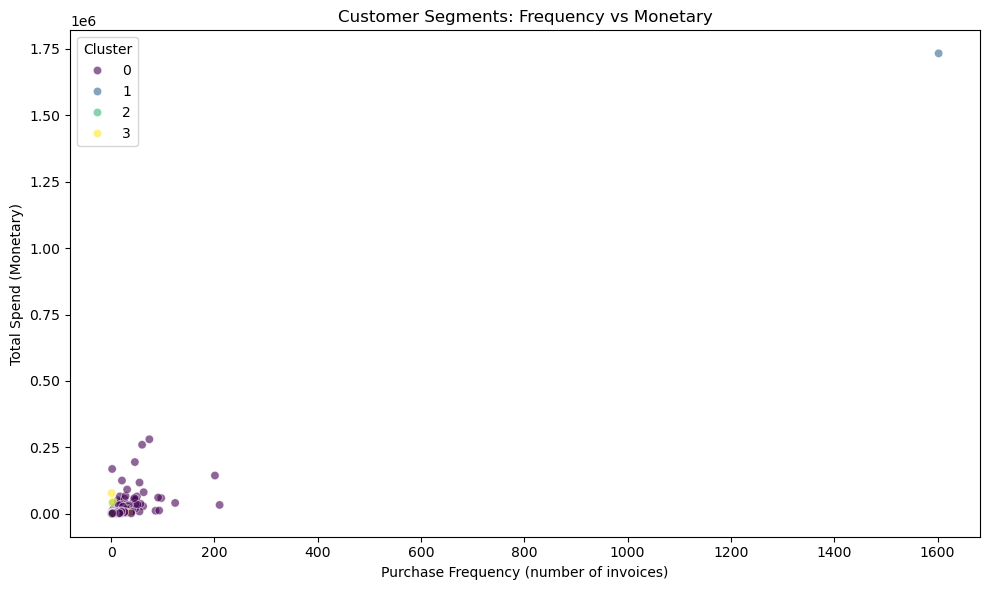

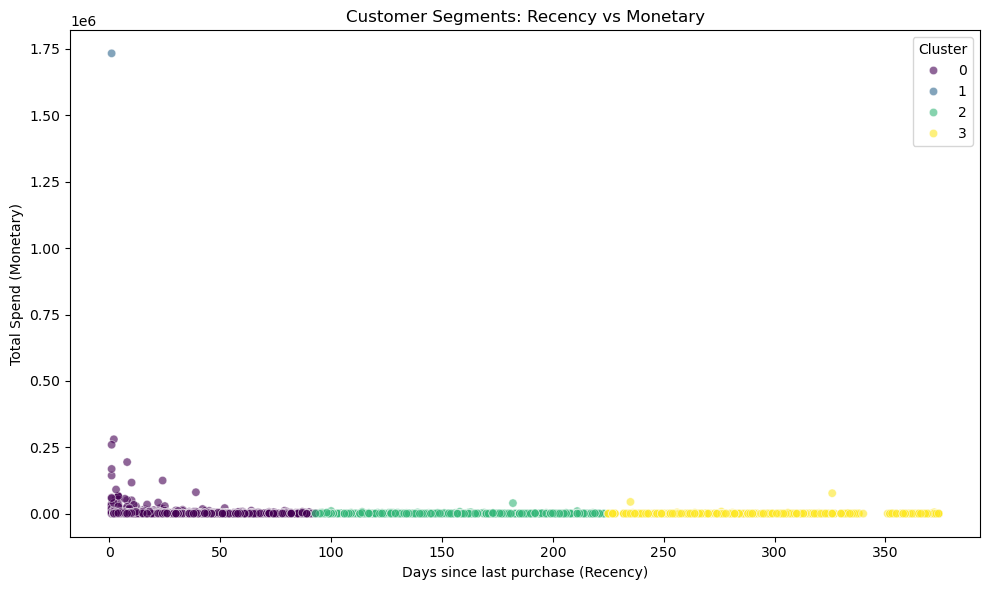

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cust_df,
    x='Frequency',
    y='Monetary',
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
plt.title('Customer Segments: Frequency vs Monetary')
plt.xlabel('Purchase Frequency (number of invoices)')
plt.ylabel('Total Spend (Monetary)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cust_df,
    x='Recency',
    y='Monetary',
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
plt.title('Customer Segments: Recency vs Monetary')
plt.xlabel('Days since last purchase (Recency)')
plt.ylabel('Total Spend (Monetary)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()